### Student Information
Name: 楊添貴

Student ID: 110006211

GitHub ID: 132459662

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

# Part 2

## Import Dataset

In [226]:
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np

In [227]:

X = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [228]:
X

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [229]:
X.isnull()

,sentiment,comment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1495,False,False
1496,False,False
1497,False,False
1498,False,False


In [230]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [231]:
X.isnull().apply(lambda x:dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

### 4.1 Dealing with Duplicate Data

In [232]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [233]:
X.drop_duplicates(inplace=True)


In [234]:
sum(X.duplicated())

0

## 5.  Data Preprocessing

### 5.1 Sampling

In [235]:
X

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


In [236]:
X_sample = X.sample(n=1000) #random state

In [237]:
len(X_sample)

1000

In [238]:
X_sample[0:4]

,sentiment,comment
942,nostalgia,"Full of memories...great memories, unforgettab..."
1073,not nostalgia,I wasn't part of the generation that grew up w...
609,not nostalgia,I prefer the original version ( in spanish ) a...
1181,nostalgia,I bought this 45 in 1966 when I was thirteen y...


In [239]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


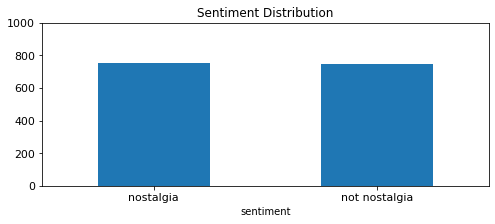

In [240]:
print(X.sentiment.value_counts())

X.sentiment.value_counts().plot(kind='bar', 
                                title='Sentiment Distribution', 
                                rot=0, 
                                fontsize=11, 
                                figsize=(8, 3), 
                                ylim=[0, 1000])  # Adjust ylim based on your data
plt.show()


sentiment
nostalgia        502
not nostalgia    498
Name: count, dtype: int64


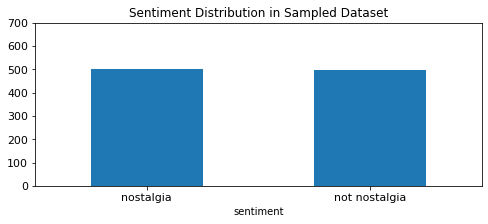

In [241]:
print(X_sample.sentiment.value_counts())
X_sample.sentiment.value_counts().plot(kind='bar', 
                                       title='Sentiment Distribution in Sampled Dataset', 
                                       rot=0, 
                                       fontsize=11, 
                                       figsize=(8, 3), 
                                       ylim=[0, 700])  # Adjust ylim based on your data
plt.show()


sentiment
nostalgia        502
not nostalgia    498
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

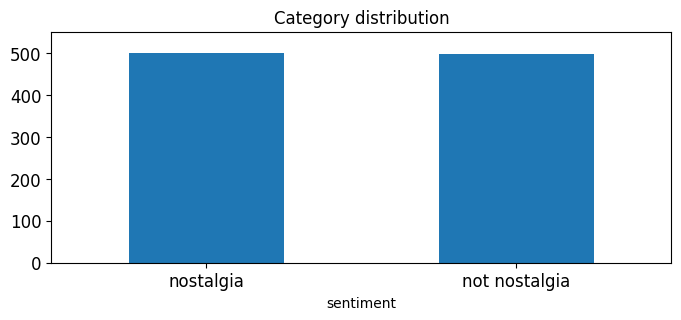

In [242]:
# Answer here
upper_bound = max(X_sample.sentiment.value_counts()) + 50
print(X_sample.sentiment.value_counts())
plt.style.use('default')
X_sample.sentiment.value_counts().plot(kind='bar', title='Category distribution', ylim=[0, upper_bound], rot=0, fontsize=12, figsize=(8, 3))


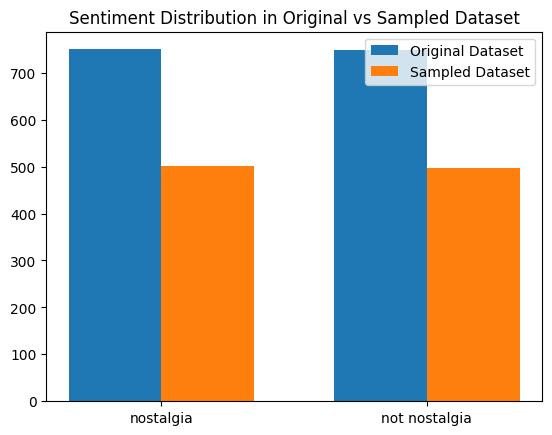

In [243]:
sentiment_counts_X = X.sentiment.value_counts()
sentiment_counts_X_sample = X_sample.sentiment.value_counts()
sentiments = sentiment_counts_X.index

x = np.arange(len(sentiments))  # Create the x locations for the groups
width = 0.35  # Width of the bars

# Set up the figure and axes
fig, ax = plt.subplots()
bars1 = ax.bar(x - width / 2, sentiment_counts_X, width, label='Original Dataset')
bars2 = ax.bar(x + width / 2, sentiment_counts_X_sample, width, label='Sampled Dataset')

# Add labels, title, and custom x-axis tick labels
ax.set_title('Sentiment Distribution in Original vs Sampled Dataset')
ax.set_xticks(x)
ax.set_xticklabels(sentiments)
ax.legend()

plt.show()


### 5.2 Feature Creation

In [244]:
import nltk

In [245]:
# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [246]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [247]:
X[0:4]

,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [248]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### 5.3 Feature subset selection

In [249]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [250]:
count_vect.get_feature_names_out()[1272]

'feel'

In [251]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [252]:
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [253]:
# We can check the shape of this matrix by:
X_counts.shape

(1499, 3730)

In [254]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [255]:
X_counts.shape

(1499, 3730)

In [256]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [257]:
# Answer here
fifth_record = X_counts[4, :].toarray()[0]
indices_with_one = fifth_record.nonzero()[0]
words_with_one = count_vect.get_feature_names_out()[indices_with_one]
print(words_with_one)

['everyday' 'him' 'his' 'listening' 'me' 'mum' 'my' 'of' 'played'
 'reminds' 'songs' 'to' 'who']


In [258]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [259]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [260]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

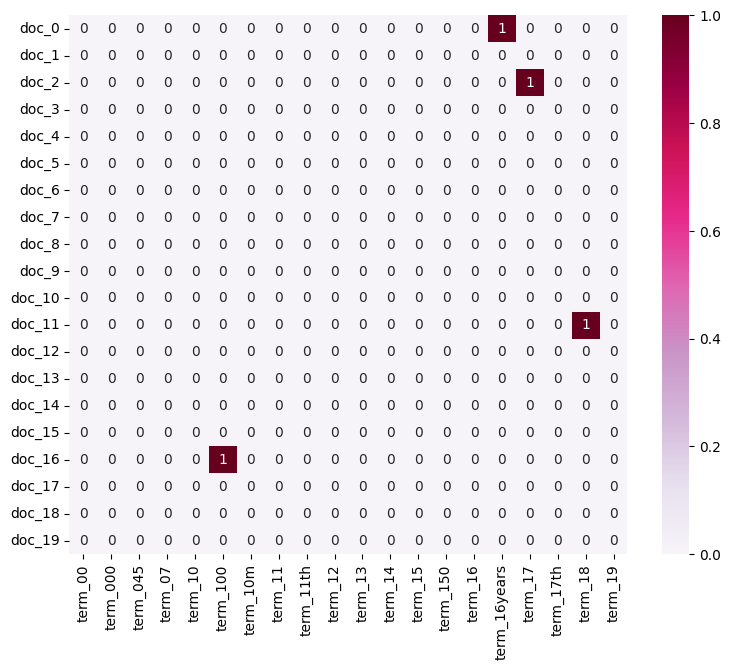

In [261]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

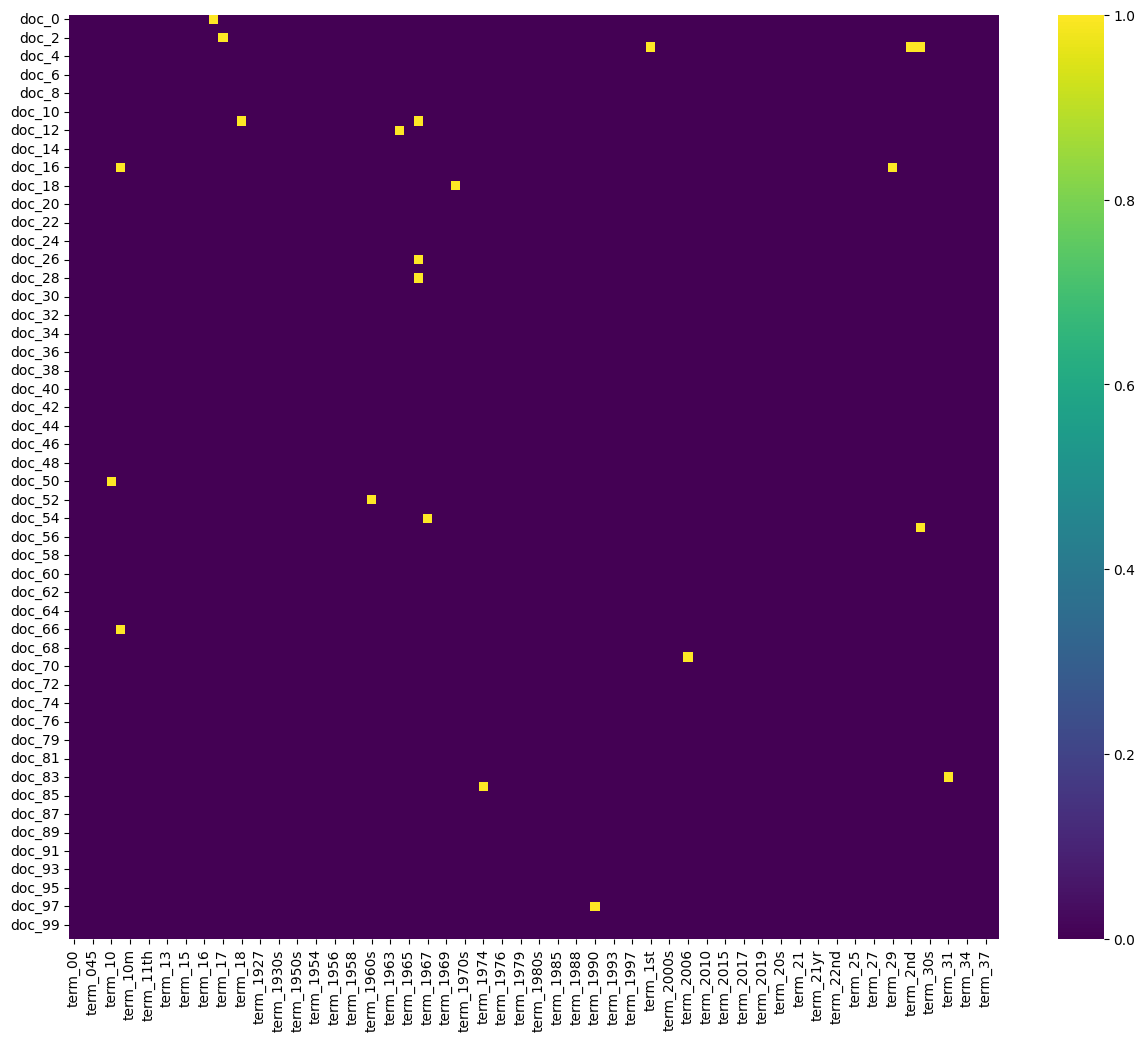

In [262]:
# Answer here
plot_x_large = ["term_" + str(i) for i in count_vect.get_feature_names_out()[0:100]] 
plot_y_large = ["doc_" + str(i) for i in list(X.index)[0:100]] 
plot_z_large = X_counts[0:100, 0:100].toarray() 

df_todraw_large = pd.DataFrame(plot_z_large, columns=plot_x_large, index=plot_y_large)

plt.subplots(figsize=(15, 12)) 
sns.heatmap(df_todraw_large, cmap="viridis", vmin=0, vmax=1, annot=False)
plt.show()



### 5.4 Attribute Transformation / Aggregation

In [263]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


In [264]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [265]:
term_frequencies[0] #sum of first term: 00

1

C:\Users\JASON\AppData\Local\Temp\ipykernel_4568\3480579971.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



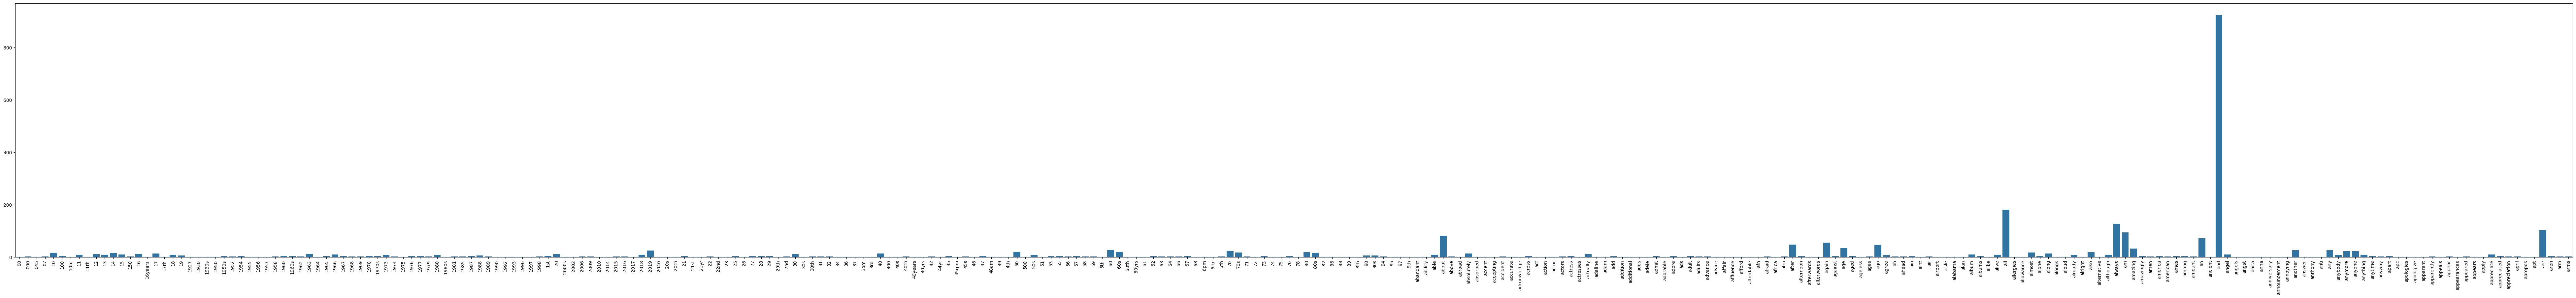

In [266]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [267]:
# Answer here
import plotly.express as px
import numpy as np

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Convert the term frequencies and feature names into a list for Plotly
term_names = count_vect.get_feature_names_out()[:300]
term_frequencies_subset = term_frequencies[:300]

# Create a DataFrame for easy plotting
import pandas as pd
data = pd.DataFrame({
    'Term': term_names,
    'Frequency': term_frequencies_subset
})

# Create the interactive plot using Plotly Express
fig = px.bar(data, x='Term', y='Frequency', title='Term Frequencies', labels={'x':'Terms', 'y':'Frequencies'})

# Customize the x-axis to rotate for readability
fig.update_layout(xaxis_tickangle=-90)

# Display the interactive plot
fig.show()


In [268]:
import plotly.express as px

# Assuming term_frequencies is already computed
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_names = count_vect.get_feature_names_out()

threshold = 50
filtered_terms = [(term_names[i], term_frequencies[i]) for i in range(len(term_frequencies)) if term_frequencies[i] > threshold]

# Convert to DataFrame
filtered_data = pd.DataFrame(filtered_terms, columns=['Term', 'Frequency'])

# Plot using Plotly
fig = px.bar(filtered_data, x='Term', y='Frequency', title='Term Frequencies (Filtered by Threshold)', labels={'x':'Terms', 'y':'Frequencies'})
fig.update_layout(xaxis_tickangle=-90)
fig.show()


In [269]:
# Answer here
# Sort terms by frequency
sorted_indices = np.argsort(term_frequencies)[::-1]  # Sort in descending order
top_n = 100  # Select top 100 terms
top_terms = [(term_names[i], term_frequencies[i]) for i in sorted_indices[:top_n]]

# Convert to DataFrame
top_terms_data = pd.DataFrame(top_terms, columns=['Term', 'Frequency'])

# Plot using Plotly
fig = px.bar(top_terms_data, x='Term', y='Frequency', title='Top 100 Term Frequencies', labels={'x':'Terms', 'y':'Frequencies'})
fig.update_layout(xaxis_tickangle=-90)
fig.show()



In [270]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\JASON\AppData\Local\Temp\ipykernel_4568\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



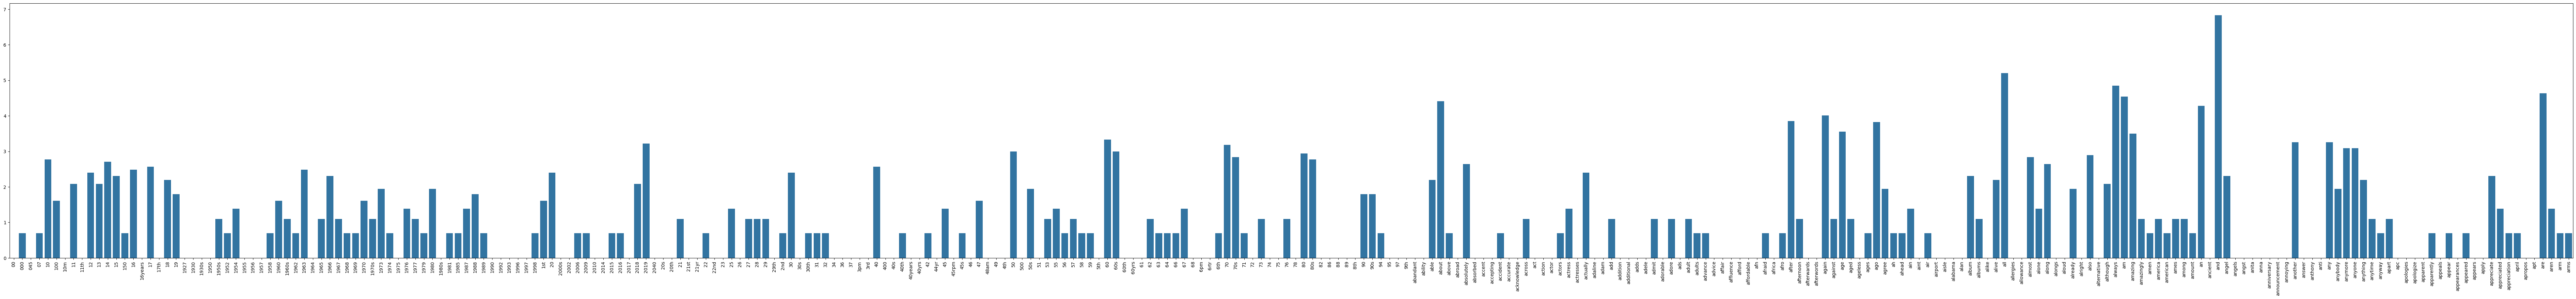

In [271]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [272]:
# Answer here
# Sort terms by frequency
sorted_indices = np.argsort(term_frequencies_log)[::-1]  # Sort in descending order
top_n = 100  # Select top 100 terms
top_terms = [(term_names[i], term_frequencies_log[i]) for i in sorted_indices[:top_n]]

# Convert to DataFrame
top_terms_data = pd.DataFrame(top_terms, columns=['Term', 'Frequency'])

# Plot using Plotly
fig = px.bar(top_terms_data, x='Term', y='Frequency', title='Top 100 Term Frequencies Log', labels={'x':'Terms', 'y':'Frequencies'})
fig.update_layout(xaxis_tickangle=-90)
fig.show()



### Intro to PAMI

In [273]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
sentiments = X['sentiment'].unique()  # Get unique category labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each category

for sentiment in sentiments:
    # Filter the original DataFrame by category
    sentiment_dfs[sentiment] = X[X['sentiment'] ==  sentiment].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for sentiment in sentiments:
    filt_term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])

In [274]:
category_number=0 #You can change it from 0 to 1 # 0 = not nostalgia , 1 = nostalgaia
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[category_number]}:")
filt_term_document_dfs[sentiments[category_number]]

Filtered Term-Document Frequency DataFrame for Sentiment not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


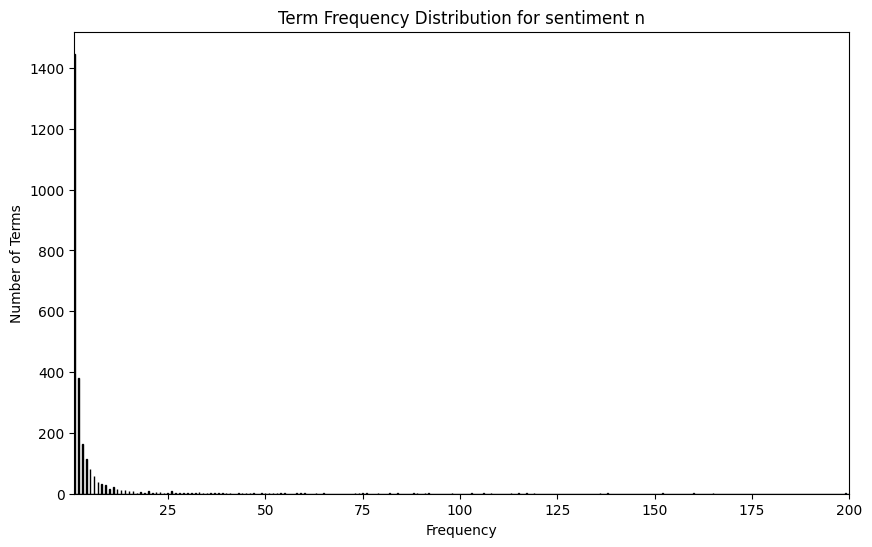

In [275]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[sentiments[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for sentiment {sentiment[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [276]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiments[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {sentiments[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'what', 'not', 'be', 'can', 'me', 'voice', 'just', 'as', 'beautiful', 'songs', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'never', 'much', 'about', 'who', 'really', 'if', 'we', 'more', 'best', 'ever', 'by', 'thank', 'think', 'would', 'only', 'how', 'don', 'still', 'has', 'very', 'there', 'am', 'out', 'him', 'these', 'could', 'up', 'old', 'hear', 'do', 'listen', 'an', 'singer', 'had', 'many', 'here', 'such', 'version', 'too', 'today', 'been', 'most', 'get', 'your', 'people', 'world', 'heard', 'man', 'video', 'some', 'sing', 'listening', 'real', 'years', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'day', 'its', 'then', 'way', 'sad', 'those',

In [277]:
sorted_counts #We can see the frequencies sorted in a descending order

array([708, 452, 451, ...,   1,   1,   1], dtype=int64)

In [278]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([2276, 2290,  160, ..., 1509, 1510,    0], dtype=int64)

In [279]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiments[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {sentiments[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [280]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 451, 452, 708], dtype=int64)

In [281]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([   0, 1510, 1509, ...,  160, 2290, 2276], dtype=int64)

In [282]:
filt_term_document_dfs[sentiments[category_number]].loc[:,'milestone'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

1

In [283]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for sentiment in sentiments:
    print(f'\nFor sentiment {sentiment} we filter the following words:')
    term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[category_number]}:")
term_document_dfs[sentiments[category_number]]



For sentiment not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For sentiment nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row       

,000,045,10,100,10m,11,12,14,15,150,...,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Similarity and differences

The analysis of the filtered words for the sentiments "nostalgia" and "not nostalgia" reveals several interesting patterns and contrasts that can provide insights into the characteristics of comments associated with each sentiment.

Both datasets contain high-frequency functional words such as "and," "to," and "the," which are essential for the grammatical structure of the sentences. These words often appear at the top of the frequency counts, indicating they are prevalent in both sentiment categories.
Both datasets include a list of words that only appeared once, showing that there are unique and possibly less impactful words in both sentiments. 

The filtered words for "nostalgia" include terms like "wonderful," "singing," and "makes," which suggest positive emotions, personal experiences, and connections to memories. In contrast, the "not nostalgia" sentiment features words such as "money," "mocking," and "minute," which imply a more transactional or negative tone. The top words for "nostalgia" tend to evoke a sense of longing or appreciation, while those for "not nostalgia" are more neutral or critical. For instance, words like "mocking" and "misunderstood" in the "not nostalgia" group might indicate sarcasm or disappointment, contrasting sharply with the more uplifting words associated with nostalgia.

In [284]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)


Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


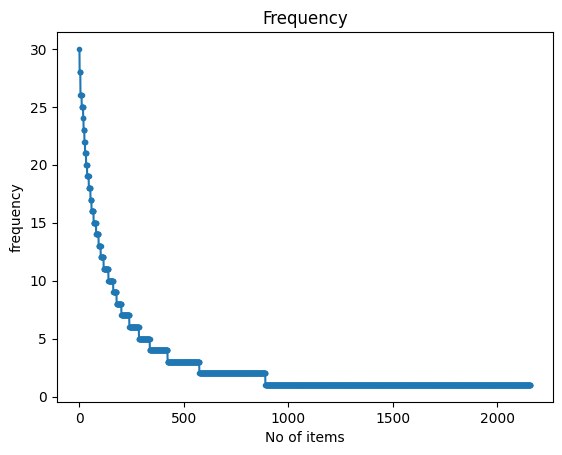

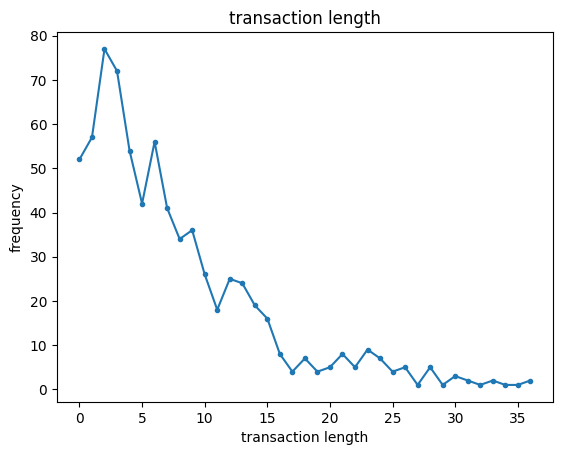

In [285]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


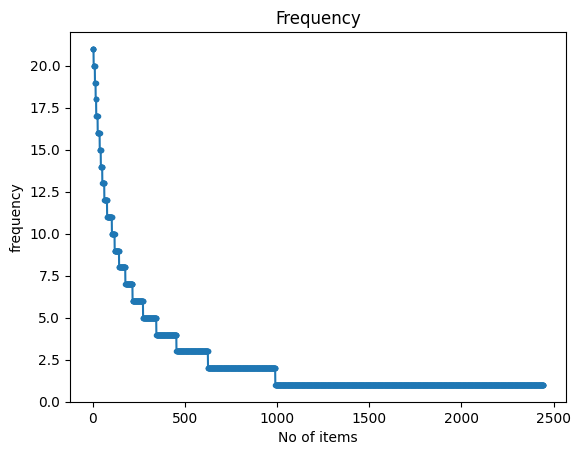

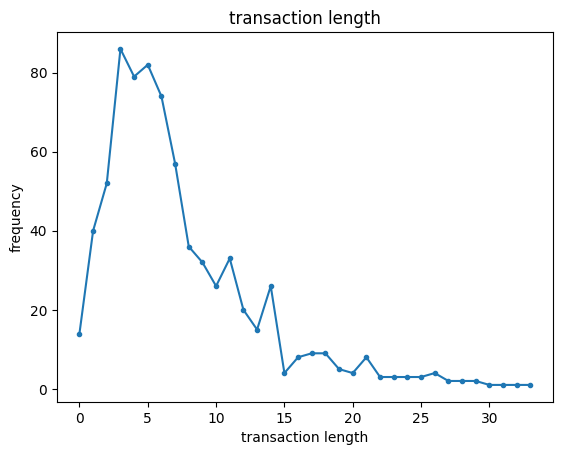

In [286]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [287]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.020945072174072266


In [288]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,will,28
178,go,28


In [289]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.013994693756103516


In [290]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,every,21
140,loved,21
141,classic,21
142,them,21


In [291]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia,frequentPatternsDF_not_nostalgia ]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [292]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [293]:
from PAMI.frequentPattern.topk import FAE as alg

k_values = [150,300,450]
results_fae = {}
for k in k_values:
    obj_fae = alg.FAE(iFile='td_freq_db_nostalgia.csv', k=k)
    
    obj_fae.mine()
    
    patterns_df_fae = obj_fae.getPatternsAsDataFrame()
    runtime_fae = obj_fae.getRuntime()
    
    results_fae[k] = {
        'patterns': patterns_df_fae,
        'runtime': runtime_fae
    }

for k, result in results_fae.items():
    print(f"\nResults for FAE Top-K with k={k}:")
    print(f"Total number of patterns: {len(result['patterns'])}")
    print(f"Runtime: {result['runtime']} seconds")
    print(result['patterns'])


 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.

Results for FAE Top-K with k=150:
Total number of patterns: 150
Runtime: 0.022940874099731445 seconds
     Patterns  Support
0    favorite       30
1        ever       28
2       would       28
3        will       28
4          go       28
..        ...      ...
145   awesome       10
146       60s       10
147      kind       10
148      real       10
149       use       10

[150 rows x 2 columns]

Results for FAE Top-K with k=300:
Total number of patterns: 300
Runtime: 0.04687237739562988 seconds
          Patterns  Support
0         favorite       30
1             ever       28
2            would       28
3             will       28
4               go       28
..             ...      ...
295        go wish        6
296       go could        6
297          70 60      

In [294]:
#  MAXFP Growth
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

min_support_values = [3, 6, 9]
results_max_fp = {}
for minSup in min_support_values:
    obj_max_fp = alg.MaxFPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)

    obj_max_fp.mine()
    
    patterns_df_max_fp = obj_max_fp.getPatternsAsDataFrame()
    runtime_max_fp = obj_max_fp.getRuntime()
    
    results_max_fp[minSup] = {
        'patterns': patterns_df_max_fp,
        'runtime': runtime_max_fp
    }

for minSup, result in results_max_fp.items():
    print(f"\nResults for MaxFPGrowth with minSup={minSup}:")
    print(f"Total number of patterns: {len(result['patterns'])}")
    print(f"Runtime: {result['runtime']} seconds")
    print(result['patterns'])


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 

Results for MaxFPGrowth with minSup=3:
Total number of patterns: 682
Runtime: 0.04591536521911621 seconds
           Patterns  Support
0          skating         3
1           walker         3
2            scott         3
3          17 1987         3
4             stop         3
..              ...      ...
677      will such         4
678      ever only         3
679     would only         4
680       ever kid         3
681  favorite will         3

[682 rows x 2 columns]

Results for MaxFPGrowth with minSup=6:
Total number of patterns: 274
Runtime: 0.024902820587158203 seconds
      Patterns  Support
0        1973         6
1     looking         6
2    actually         6
3        fast         6
4    innocent         6
..         ...   

### 5.5 Dimensionality Reduction

In [295]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [296]:
X_pca_tdm.shape

(1499, 2)

In [297]:
X_tsne_tdm.shape

(1499, 2)

In [298]:
X_umap_tdm.shape

(1499, 2)

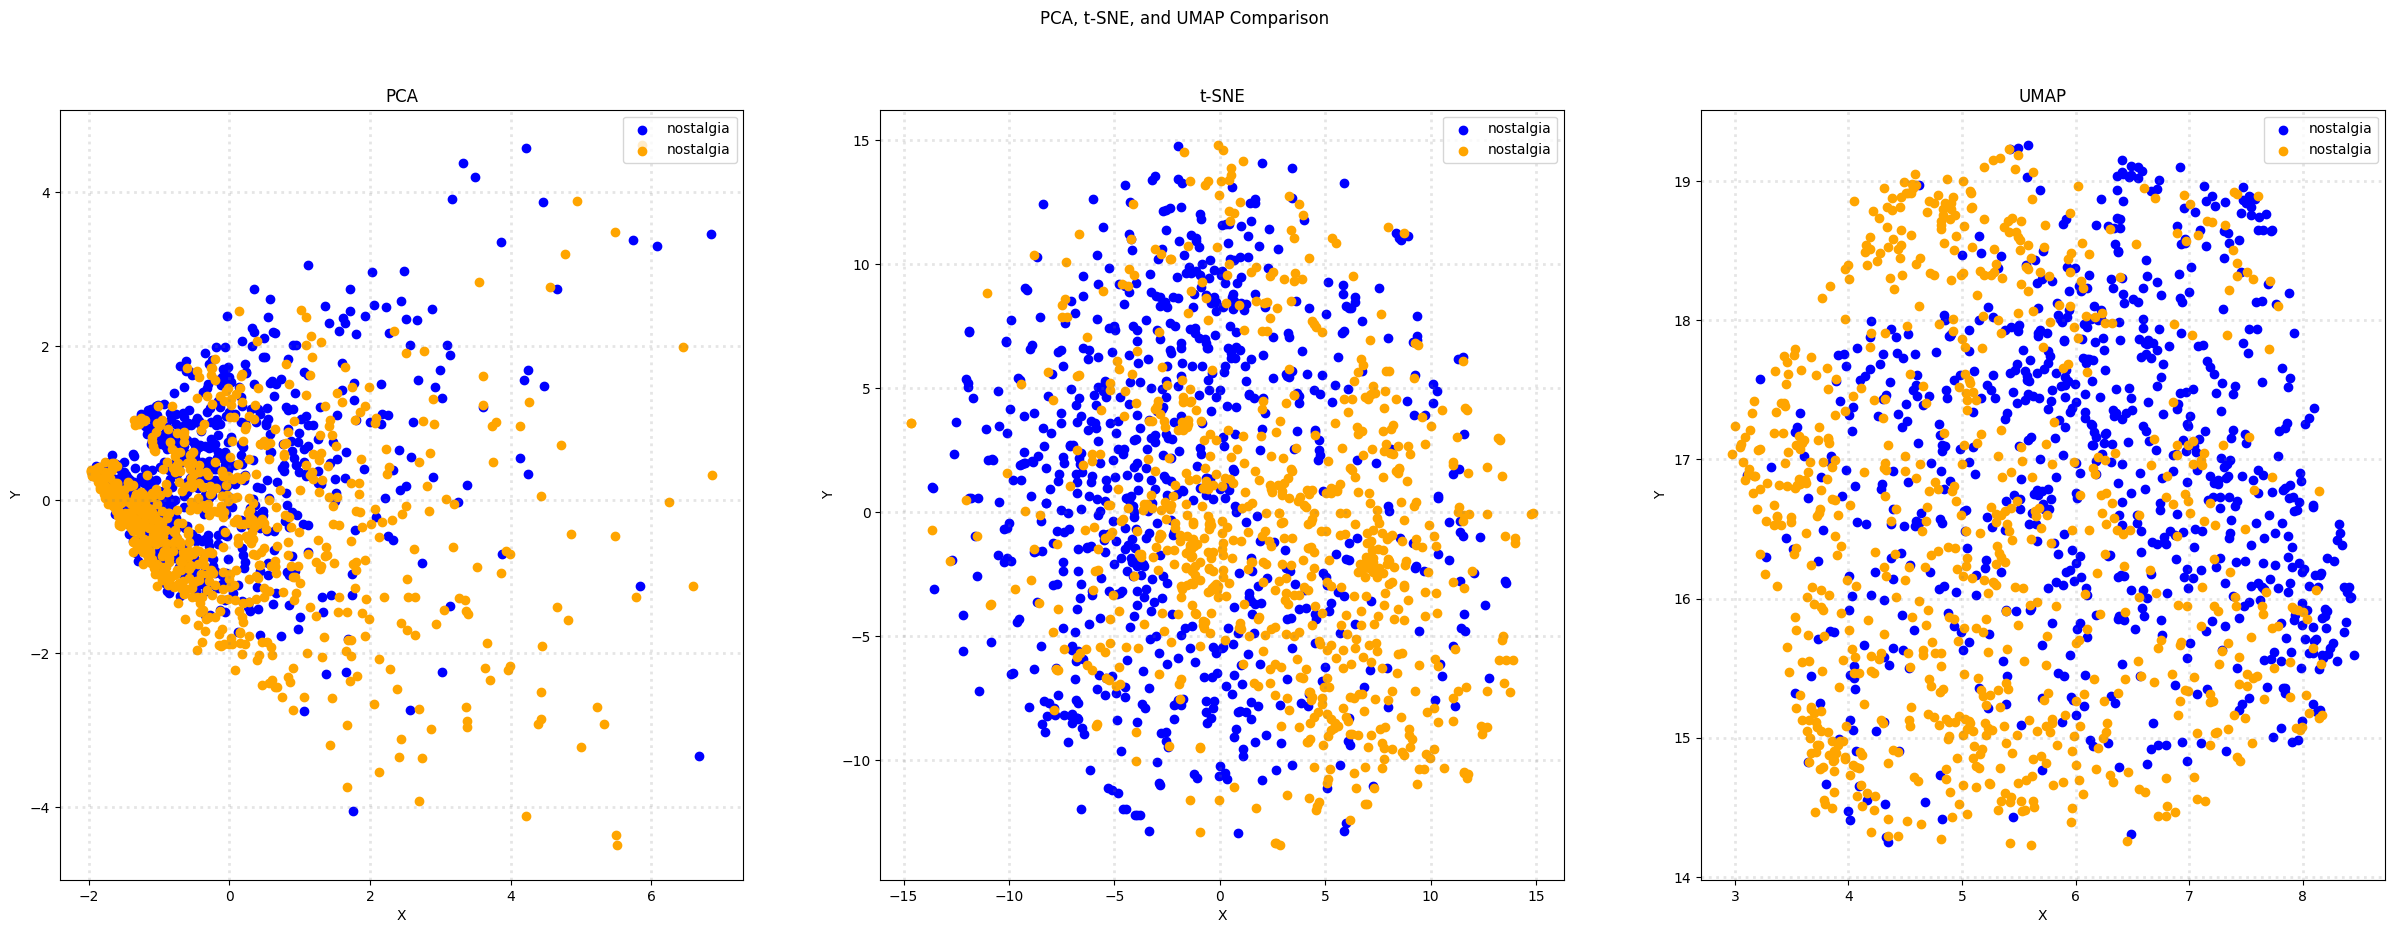

In [299]:
# Plot the results in subplots
col = ['blue', 'orange']
sentiments = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [300]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

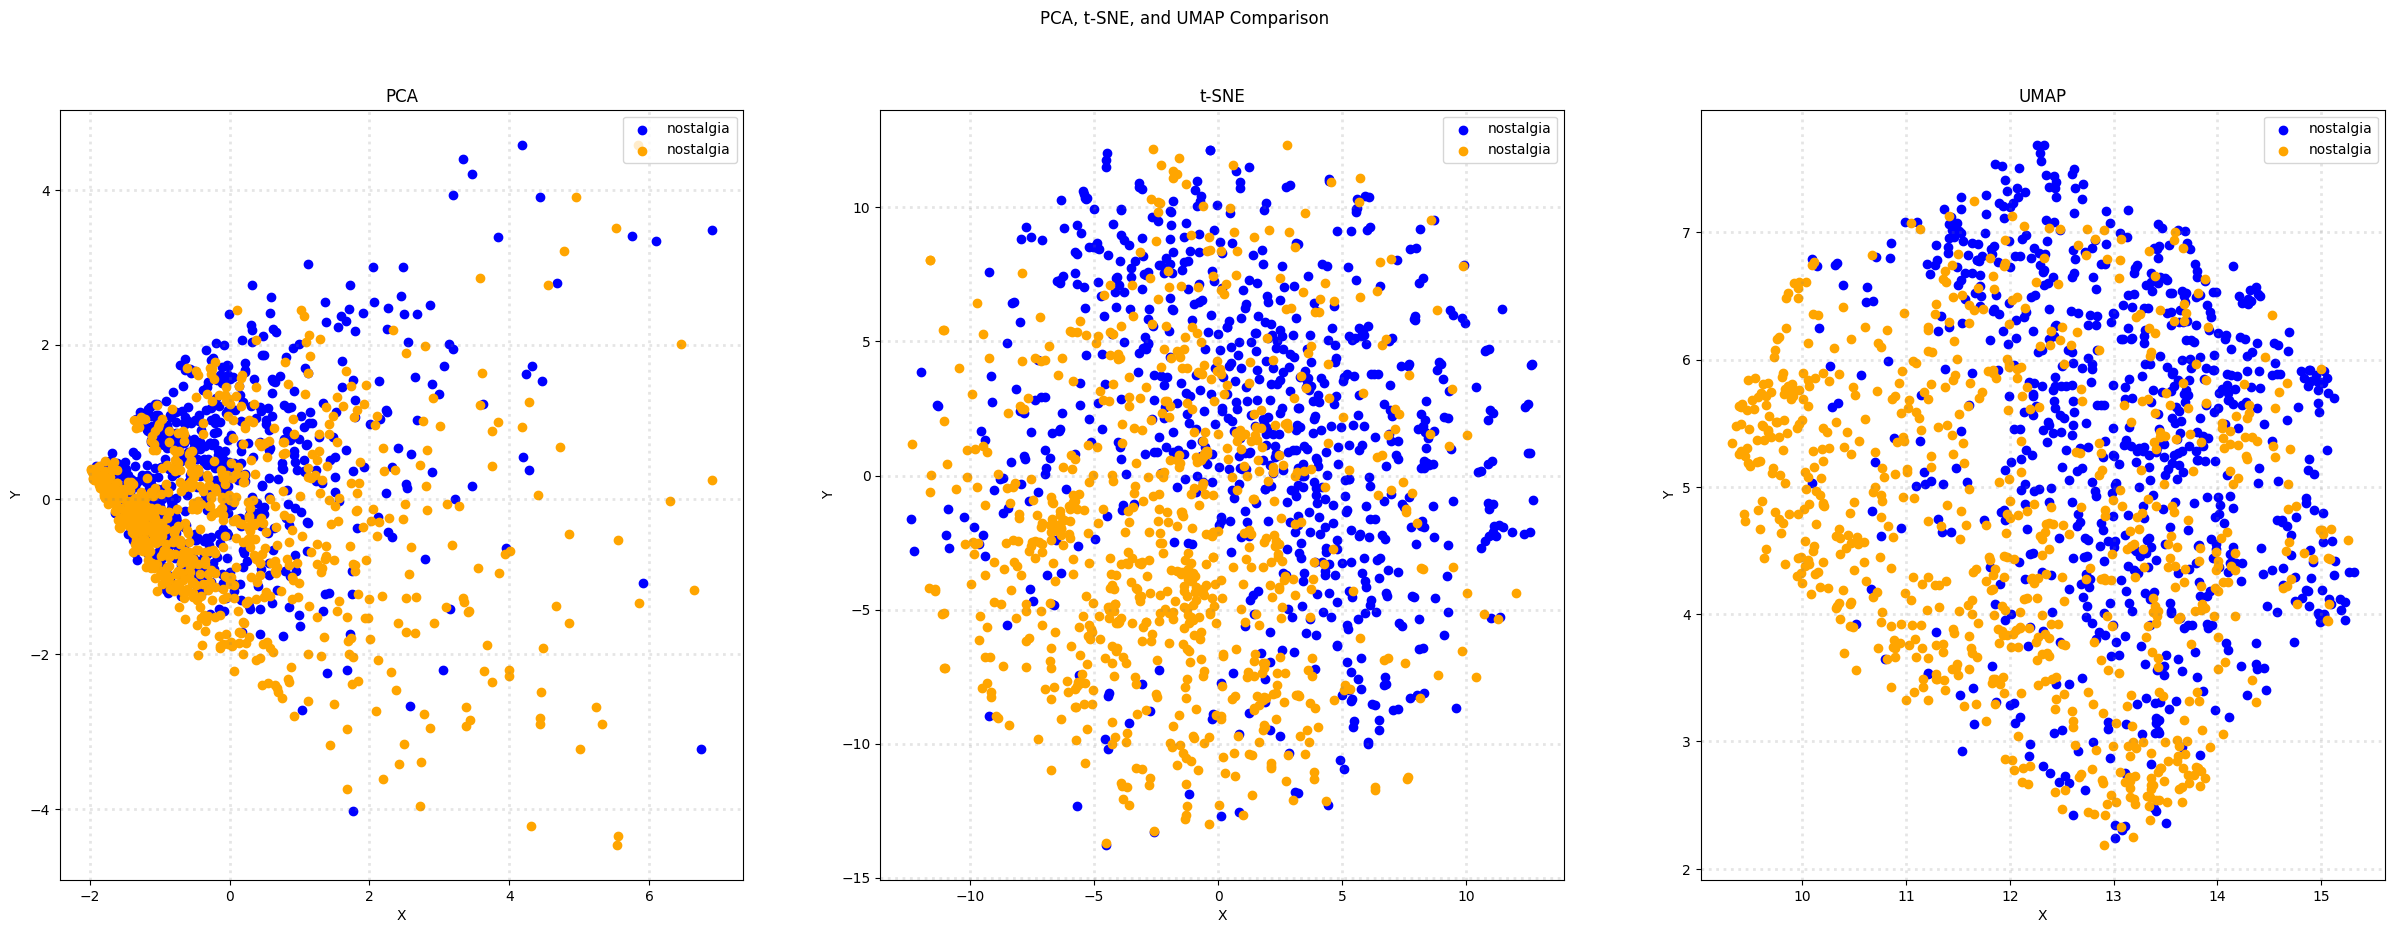

In [301]:
col = ['blue', 'orange']
sentiments = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

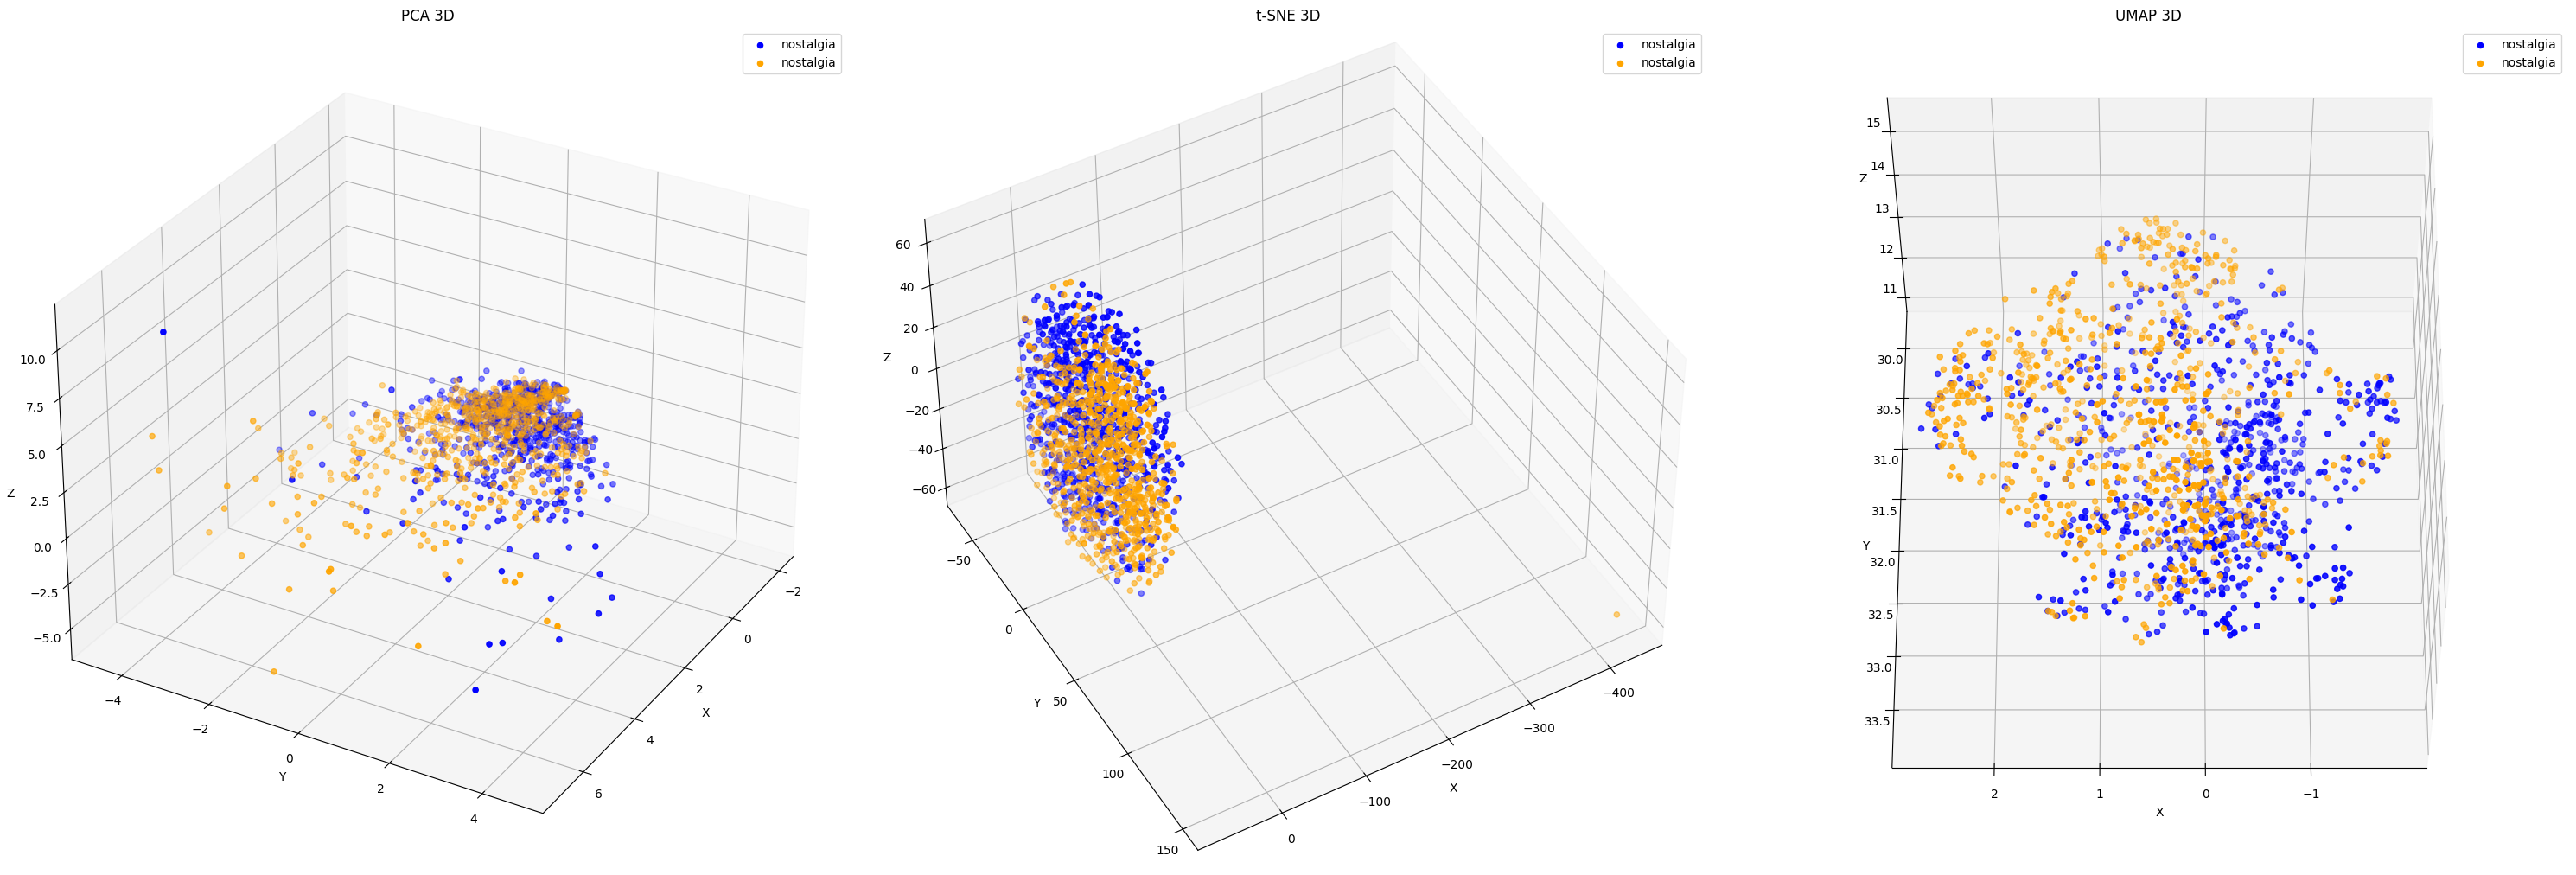

In [302]:

from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

X_pca_3d_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_3d_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)


def plot_3d_scatter(ax, X_reduced, title, angle):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        zs = X_reduced[X['sentiment'] == sentiment].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

fig = plt.figure(figsize=(30, 10))

angles = [(30, 30), (45, 60), (60, 90)] 
titles = ['PCA 3D', 't-SNE 3D', 'UMAP 3D']
data = [X_pca_3d_tdm, X_tsne_3d_tdm, X_umap_3d_tdm]

for i, (title, angle, X_reduced) in enumerate(zip(titles, angles, data)):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    plot_3d_scatter(ax, X_reduced, title, angle)

plt.tight_layout()
plt.show()


### 5.6 Discretization and Binarization

In [303]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [304]:
mlb = preprocessing.LabelBinarizer()

In [305]:
mlb.fit(X.sentiment)

LabelBinarizer()

In [306]:
X[0:9]

,sentiment,comment,unigrams,tokenized_text
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{emotional, Reeves, we, fan, great, Although, ..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{when, mist, and, to, kid, ever, Never, singin..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{job, Reeves, were, great, --, loving, and, bu..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{Nam, when, served, are, all, and, some, later..."
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{songs, him, of, everyday, his, listening, me,..."
5,nostalgia,"Every time I heard this song as a child, I use...","[Every, time, I, heard, this, song, as, a, chi...","{appreciate, fear, funerals., your, death,, Ji..."
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...","[My, dad, loved, listening, to, Jim, Reeves, ,...","{then,, things., when, listening, but, Jim, Ti..."
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{Reeves, ., LISTENED, nostalgic, and, Jim, to,..."
8,not nostalgia,Wherever you are you always in my heart,"[Wherever, you, are, you, always, in, my, heart]","{Wherever, in, are, always, you, heart, my}"


In [307]:
# Answer here
mlb.fit(X['sentiment'])
X['bin_category'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

#Yes, it does work as the binary result is the exact same.

,sentiment,comment,unigrams,tokenized_text,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{emotional, Reeves, we, fan, great, Although, ...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{when, mist, and, to, kid, ever, Never, singin...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{job, Reeves, were, great, --, loving, and, bu...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{Nam, when, served, are, all, and, some, later...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{songs, him, of, everyday, his, listening, me,...",[0]
5,nostalgia,"Every time I heard this song as a child, I use...","[Every, time, I, heard, this, song, as, a, chi...","{appreciate, fear, funerals., your, death,, Ji...",[0]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...","[My, dad, loved, listening, to, Jim, Reeves, ,...","{then,, things., when, listening, but, Jim, Ti...",[0]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{Reeves, ., LISTENED, nostalgic, and, Jim, to,...",[0]
8,not nostalgia,Wherever you are you always in my heart,"[Wherever, you, are, you, always, in, my, heart]","{Wherever, in, are, always, you, heart, my}",[1]


# 6. Data Exploration

In [308]:
# We retrieve 3 sentences for a random comment
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [309]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [310]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [311]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# 7. Data Classification

In [312]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)

In [313]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [314]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [315]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [316]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=42)

In [317]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [318]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [319]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred,digits=4))

Accuracy: 0.8644444444444445

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8185    0.9485    0.8787       233
not nostalgia     0.9333    0.7742    0.8463       217

     accuracy                         0.8644       450
    macro avg     0.8759    0.8613    0.8625       450
 weighted avg     0.8739    0.8644    0.8631       450



# Part 3

### Meaningful data visualizations

In [320]:
from wordcloud import WordCloud

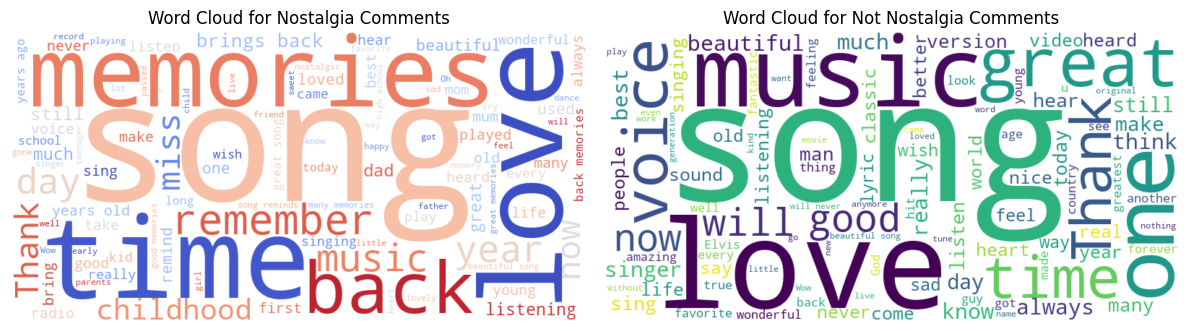

In [326]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Filter comments by sentiment
nostalgia_comments = X[X['sentiment'] == 'nostalgia']['comment']
not_nostalgia_comments = X[X['sentiment'] == 'not nostalgia']['comment']

# Step 2: Combine comments into a single string for each sentiment
nostalgia_text = ' '.join(nostalgia_comments)
not_nostalgia_text = ' '.join(not_nostalgia_comments)

# Step 3: Generate the word cloud for nostalgia with a different color
wordcloud_nostalgia = WordCloud(width=800, height=400,
                                 background_color='white',
                                 colormap='coolwarm',  # Different colormap for nostalgia
                                 max_words=100,
                                 random_state=30).generate(nostalgia_text)

# Step 4: Generate the word cloud for not nostalgia with a different color
wordcloud_not_nostalgia = WordCloud(width=800, height=400,
                                     background_color='white',
                                     colormap='viridis',  # Different colormap for not nostalgia
                                     max_words=100,
                                     random_state=30).generate(not_nostalgia_text)

# Step 5: Display the word clouds
plt.figure(figsize=(12, 6))

# Nostalgia Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_nostalgia, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Nostalgia Comments')

# Not Nostalgia Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_not_nostalgia, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Not Nostalgia Comments')

plt.tight_layout()
plt.show()


### TF-IDF Features

In [322]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the comments to generate the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(X['comment'])

# Convert the TF-IDF matrix to a DataFrame for easier inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the shape of the TF-IDF matrix and the first few rows
print("TF-IDF matrix shape:", tfidf_df.shape)
print(tfidf_df.head())


TF-IDF matrix shape: (1499, 3730)
    00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

   youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
2    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
3    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
4    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[5 rows x 3730 columns]


### Naive Bayes Classifier

In [323]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Prepare the data
y = X['sentiment']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X['comment'], y, test_size=0.2, random_state=42)

# Step 2: Generate TF-IDF Features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 3: Train and Evaluate Bernoulli Naive Bayes Classifier with TF-IDF Features
bnb_tfidf = BernoulliNB()
bnb_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = bnb_tfidf.predict(X_test_tfidf)

print("TF-IDF Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

# Step 4: Generate Word Frequency Features
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Step 5: Train and Evaluate Bernoulli Naive Bayes Classifier with Word Frequency Features
bnb_count = BernoulliNB()
bnb_count.fit(X_train_count, y_train)

y_pred_count = bnb_count.predict(X_test_count)

print("Word Frequency Classifier:")
print("Accuracy:", accuracmy_score(y_test, y_pred_count))
print(classification_report(y_test, y_pred_count))


TF-IDF Classifier:
Accuracy: 0.8566666666666667
               precision    recall  f1-score   support

    nostalgia       0.82      0.92      0.87       158
not nostalgia       0.90      0.78      0.84       142

     accuracy                           0.86       300
    macro avg       0.86      0.85      0.85       300
 weighted avg       0.86      0.86      0.86       300

Word Frequency Classifier:
Accuracy: 0.8566666666666667
               precision    recall  f1-score   support

    nostalgia       0.82      0.92      0.87       158
not nostalgia       0.90      0.78      0.84       142

     accuracy                           0.86       300
    macro avg       0.86      0.85      0.85       300
 weighted avg       0.86      0.86      0.86       300



### Differences between MultinomialNB and BernouhliNB Results

The Multinomial Naive Bayes (MNB) classifier achieved a higher accuracy of 86.89%, showing a strong recall for the "nostalgia" class (95.28%) but a lower recall for "not nostalgia" (77.88%), indicating it effectively identifies nostalgia comments while misclassifying some non-nostalgia ones. In contrast, both Bernoulli Naive Bayes (BNB) classifiers, using either TF-IDF or word frequency features, yielded slightly lower accuracy at 85.67% with balanced precision and recall metrics. BNB achieved higher precision for "not nostalgia" (90%) but lower recall for "nostalgia" (92%) compared to MNB. Overall, while MNB excels in identifying nostalgia comments, BNB offers a more balanced performance across classes, making the choice between them dependent on whether the goal is to minimize false negatives or maintain overall balance in classification.

# Part 4

Data Cleaning: One area of inefficiency could be in the aggressive removal of duplicates or null values, which may lead to the loss of potentially valuable information. Additionally, if inconsistent formatting (e.g., different date formats, varying capitalization) was ignored, this could create problems later in the analysis. To enhance this process, implement more sophisticated cleaning techniques that retain valuable outliers or missing values that can be imputed. Using regex or standardized libraries can help ensure consistent formatting throughout the dataset.

Feature Engineering: The handling of features may not have been optimized, missing opportunities to enhance model performance. For example, categorical variables may have been handled with simple label encoding rather than employing one-hot encoding or target encoding, which can lead to misleading results. To improve feature engineering, analyze the importance of existing features and derive new ones that could provide more context, such as creating interaction features or polynomial features. Additionally, consider using one-hot encoding or target encoding for categorical variables to improve their representation.

Handling Imbalanced Datasets: If the dataset exhibits class imbalances, a simple split may lead to models biased toward the majority class. To mitigate this issue, apply techniques like oversampling (SMOTE) or undersampling to balance the classes. Alternatively, use cost-sensitive learning or adjust class weights during model training to better handle imbalanced data.

Data Splitting: Randomly splitting the dataset without considering stratification can result in imbalanced training and testing sets. To improve this, use stratified sampling to ensure that the training and test datasets represent the same distribution of classes, especially for imbalanced datasets.

Redundant Processing: Repeated transformations or processing steps can significantly slow down the preprocessing phase. To streamline this process, utilize pipeline frameworks (such as Scikit-learn pipelines) to ensure that each transformation step is applied only once and efficiently.